<p align = "center">
<img src="https://academy.sdaia.gov.sa/assets/images/academy-logo.png" align = "center" width="400">
</p>

<p align = "center">
<img src="https://upload.wikimedia.org/wikipedia/ar/9/96/%D8%B4%D8%B9%D8%A7%D8%B1_%D8%A3%D9%83%D8%A7%D8%AF%D9%8A%D9%85%D9%8A%D8%A9_%D8%B7%D9%88%D9%8A%D9%82.png" align = "center" width="400">
</p>
<div> </div>
<div>
<p><br><br></p>
<h1 align="center"><b>GROUP NO.6</b></h1>
<h3 align="center">Azzam Alharbi</h3>
<h3 align="center">Raheil Alotaibi </h3>
<h3 align="center">Manar Khamees</h3>
</div>

# Project: Understanding and Predicting Employee Turnover

A case study in prescriptive analytics.

### Project Statement

Portobello Tech is an app innovator that has devised an intelligent way of predicting employee turnover within the company. It periodically evaluates employees' work details including the number of projects they worked upon, average monthly working hours, time spent in the company, promotions in the last 5 years, and salary level.

Data from prior evaluations show the employee’s satisfaction at the workplace. The data could be used to identify patterns in work style and their interest to continue to work in the company.

The HR Department owns the data and uses it to predict employee turnover. Employee turnover refers to the total number of workers who leave a company over a certain time period.

As the ML Developer assigned to the HR Department, you have been asked to create ML Programs to:

1. Perform data quality check by checking for missing values if any.
2. Understand what factors contributed most to employee turnover by EDA.
3. Perform clustering of Employees who left based on their satisfaction and evaluation.
4. Handle the left Class Imbalance using SMOTE technique.
5. Perform k-fold cross-validation model training and evaluate performance.
6. Identify the best model and justify the evaluation metrics used.
7. Suggest various retention strategies for targeted employees.


Data source: `HR.csv`

| Column Name             | Description                                                   |
|-------------------------|---------------------------------------------------------------|
| satisfaction_level      | satisfaction level at the job of an employee                   |
| last_evaluation         | Rating between 0 to 1, received by an employee at his last evaluation |
| number_project          | Number of projects, an employee involved in                    |
| average_montly_hours    | Average number of hours in a month, spent by an employee at office |
| time_spend_company      | Number of years spent in the company                           |
| Work_accident           | 0 - no accident during employee stay, 1 - accident during employee stay |
| left                    | 0 indicates employee stays in the company, 1 indicates - employee left the company |
| promotion_last_5years   | Number of promotions in his stay                              |
| Department              | Department, an employee belongs to                            |
| salary                  | Salary in USD                                                 |

### We'll be covering:
- **Descriptive Analytics** - What happened?
- **Predictive Analytics** - What might happen?
- **Prescriptive Analytics** - What should we do?


***
### Objective:
- To understand what factors contributed most to employee turnover.
- To perform clustering of Employees who left based on their satisfaction and evaluation
- To create a model that predicts the likelihood if a certain employee will leave the company or not.
- To create or improve different retention strategies on targeted employees.

## Steps

### 1. Perform a data quality check to identify any missing values.


### 2. Conduct exploratory data analysis (EDA) to determine the main factors contributing to employee turnover.
   1. Generate a heatmap of the correlation matrix for all numerical features/columns in the dataset.
   1. Plot the distribution of the following variables:
      - Employee Satisfaction (using the "satisfaction_level" column)
      - Employee Evaluation (using the "last_evaluation" column)
      - Average Monthly Hours (using the "average_montly_hours" column)
   1. Create a bar plot showing the Employee Project Count for both employees who left and those who stayed in the organization (using the "number_project" column and the "left" column as the hue). Provide insights based on the plot.


### 3. Perform clustering of employees who left based on their satisfaction and evaluation.
   1. Select the columns "satisfaction_level", "last_evaluation", and "left".
   1. Apply KMeans clustering to the employees who left the company, dividing them into 3 clusters.
   1. Based on the satisfaction and evaluation factors, analyze and describe the characteristics of each employee cluster.


### 4. Address the class imbalance in the "left" variable using the SMOTE technique.
   1. Pre-process the data by converting categorical columns to numerical columns:
      - Separate categorical variables from numeric variables.
      - Apply the get_dummies() function to encode the categorical variables.
      - Combine the categorical and numeric variables.
   1. Split the dataset into training and testing sets using a stratified 80:20 ratio with a random state of 123.
   1. Use the SMOTE technique from the imblearn module to upsample the training dataset.


### 5. Perform 5-fold cross-validation for model training and performance evaluation.
   1. Train a Logistic Regression model and apply 5-fold cross-validation. Plot the classification report.
   1. Train a Random Forest Classifier model and apply 5-fold cross-validation. Plot the classification report.
   1. Train a Gradient Boosting Classifier model and apply 5-fold cross-validation. Plot the classification report.


### 6. Determine the best model and justify the evaluation metrics used.
   1. Calculate the ROC/AUC for each model and plot the ROC curves.
   1. Compute the confusion matrix for each model.
   1. Based on the confusion matrix, explain whether Recall or Precision should be prioritized.


### 7. Provide various retention strategies for targeted employees.
   1. Use the best model to predict the probability of employee turnover in the test data.
   1. Categorize employees into four zones based on the probability scores and suggest appropriate retention strategies for each zone:
      - Safe Zone (Green) (Score < 20%)
      - Low Risk Zone (Yellow) (20% < Score < 60%)
      - Medium Risk Zone (Orange) (60% < Score < 90%)
      - High Risk Zone (Red) (Score > 90%).

## 1. Perform a data quality check to identify any missing values.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.shape

(14999, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [6]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [7]:
df.duplicated().sum()

3008

In [8]:
# drop duplicates
df = df.drop_duplicates()

In [9]:
df.duplicated().sum()

0

In [10]:
df.shape

(11991, 10)

In [11]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [12]:
df['sales'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [13]:
# Convert sales column to lower cases
df['sales'] = df['sales'].str.upper()

In [14]:
df['sales'].unique()

array(['SALES', 'ACCOUNTING', 'HR', 'TECHNICAL', 'SUPPORT', 'MANAGEMENT',
       'IT', 'PRODUCT_MNG', 'MARKETING', 'RANDD'], dtype=object)

In [15]:
# rename column
df.rename(columns = {'sales':'department'}, inplace = True)

In [16]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000



## 2. Conduct exploratory data analysis (EDA) to determine the main factors contributing to employee turnover.

### Generate a heatmap of the correlation matrix for all numerical features/columns in the dataset.

In [17]:
Categorical = df.select_dtypes(include=['object'])
Numerical = df.select_dtypes(exclude=['object'])

In [18]:
# numerical columns
print(f"Numerical Columns: \n{Numerical.dtypes}")

Numerical Columns: 
satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
dtype: object


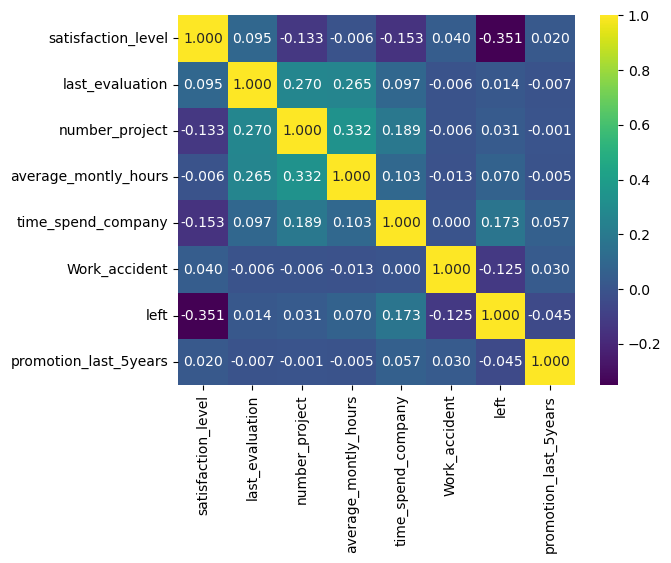

In [19]:
# Generate a heatmap of the correlation matrix for all numerical features/columns in the dataset.
# correlation matrix
corr_matrix = Numerical.corr()

# plotting the heatmap
sns.heatmap(data = corr_matrix,cmap='viridis', annot=True, fmt=".3f") #fmt means we want to display exactly 3 decimal
plt.show()

### Plot the distribution of the following variables:
* Employee Satisfaction (using the "satisfaction_level" column)
* Employee Evaluation (using the "last_evaluation" column)
* Average Monthly Hours (using the "average_montly_hours" column

<AxesSubplot:xlabel='satisfaction_level', ylabel='Count'>

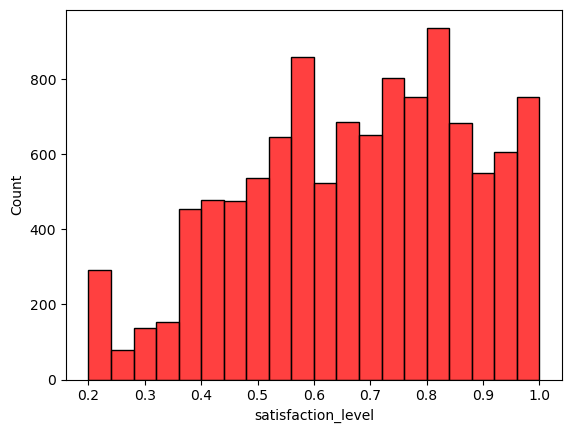

In [20]:
#  - Employee Satisfaction (using the "satisfaction_level" column)
sns.histplot(data=df, x='satisfaction_level', bins=20,binrange=[0.2,1], color='r')

<AxesSubplot:xlabel='last_evaluation', ylabel='Count'>

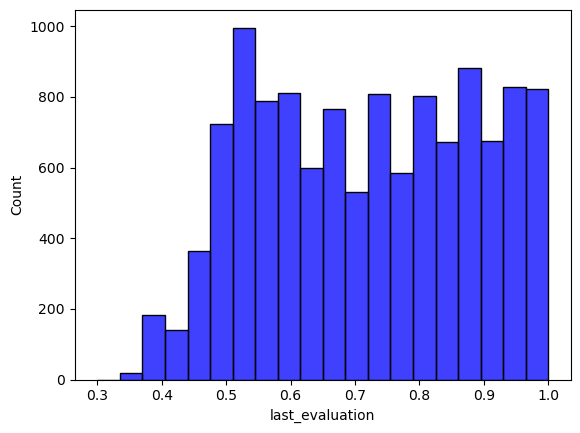

In [21]:
# Employee Evaluation (using the "last_evaluation" column)
sns.histplot(data=df, x='last_evaluation', bins=20,binrange=[0.3,1], color='b')

<AxesSubplot:xlabel='average_montly_hours', ylabel='Count'>

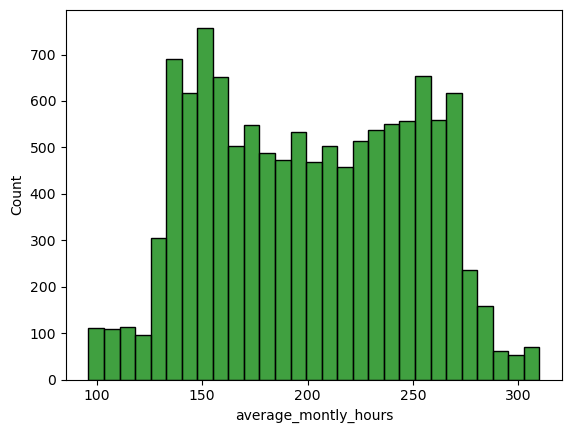

In [22]:
# Average Monthly Hours (using the "average_montly_hours" column)
sns.histplot(data=df, x='average_montly_hours', color='g')

### Create a bar plot showing the Employee Project Count for both employees who left and those who stayed in the organization (using the "number_project" column and the "left" column as the hue). Provide insights based on the plot.

<AxesSubplot:xlabel='number_project', ylabel='count'>

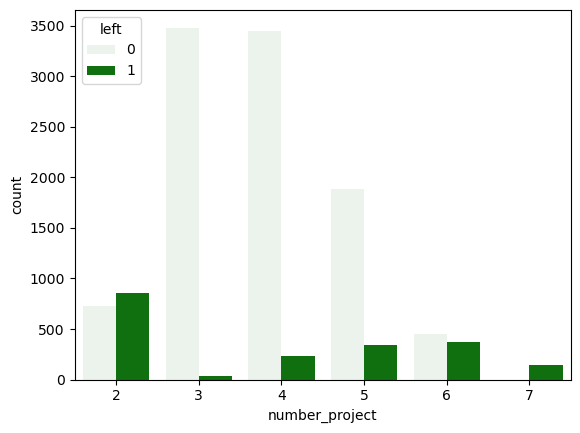

In [23]:
sns.countplot(x=df['number_project'], hue=df['left'], color='g')

####  Provide insights based on the plot:
     - More than half of employees with 2, 6 and 7 projects left the company.
     Majority of the employees who did not leave the company had 3,4,and 5 projects.
     All of the employees with 7 projects left the company.
     There is an increase in employee turnover rate as project count increases.

## 3. Perform clustering of employees who left based on their satisfaction and evaluation.


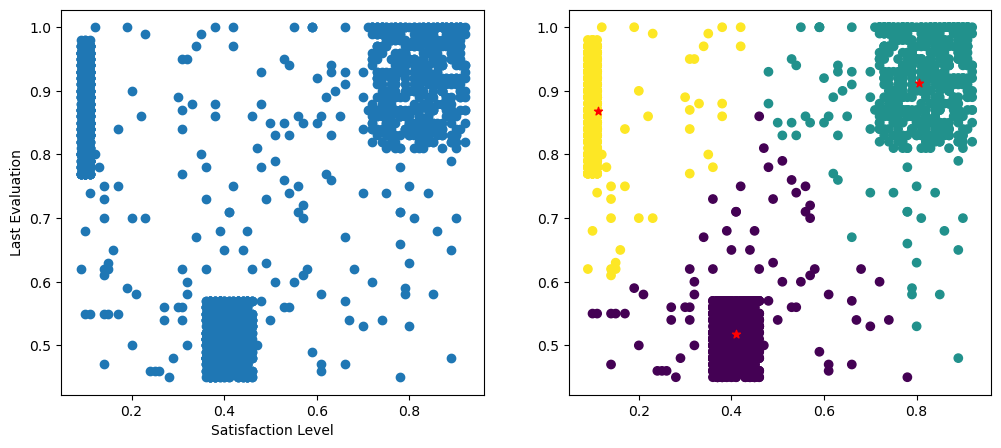

In [24]:
# Select the columns "satisfaction_level", "last_evaluation", and "left".
employees_left= df.loc[df['left']==1]
data = employees_left[["satisfaction_level", "last_evaluation"]]
# plot data
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(data['satisfaction_level'], data['last_evaluation'])
plt.xlabel("Satisfaction Level")
plt.ylabel("Last Evaluation")

# Apply KMeans clustering to the employees who left the company, dividing them into 3 clusters.
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
pred = kmeans.fit_predict(data)

# Based on the satisfaction and evaluation factors, analyze and describe the characteristics of each employee cluster.
plt.subplot(1,2,2)
plt.scatter(data['satisfaction_level'], data['last_evaluation'],c = pred)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='red',marker='*')
plt.show()

In [49]:
kmeans.cluster_centers_

array([[0.41013304, 0.51719512],
       [0.80587387, 0.91257658],
       [0.1111985 , 0.86906367]])

#### Analyze and describe the characteristics of each employee cluster

 
  * The employees who left were divided into three groups, the yellow group represents employees with a low level of satisfaction and high evaluation.
 
  * The purple group represents employees with low satisfaction and low evaluation.
  * The green group represents employees with a high level of satisfaction and high evaluation.

## 4. Address the class imbalance in the "left" variable using the SMOTE technique.

In [25]:
# Apply the get_dummies() function to encode the categorical variables.
encode_categorical = pd.get_dummies(Categorical)
# Combine the categorical and numeric variables.
concatenated = pd.concat([Numerical, encode_categorical], axis="columns")
concatenated.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department_ACCOUNTING,department_HR,...,department_MANAGEMENT,department_MARKETING,department_PRODUCT_MNG,department_RANDD,department_SALES,department_SUPPORT,department_TECHNICAL,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [26]:
# Split the dataset into training and testing sets using a stratified 80:20 ratio with a random state of 123.
from sklearn.model_selection import train_test_split
X = concatenated.drop(columns=['left'])
y = concatenated['left']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=123)

# Use the SMOTE technique from the imblearn module to upsample the training dataset.
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
features_resampled, labels_resampled = oversample.fit_resample(X, y)

In [27]:
X

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department_ACCOUNTING,department_HR,department_IT,department_MANAGEMENT,department_MARKETING,department_PRODUCT_MNG,department_RANDD,department_SALES,department_SUPPORT,department_TECHNICAL,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0
11996,0.74,0.95,5,266,10,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
11997,0.85,0.54,3,185,10,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
11998,0.33,0.65,3,172,10,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0


In [28]:
labels_resampled.value_counts()

1    10000
0    10000
Name: left, dtype: int64

<AxesSubplot:ylabel='left'>

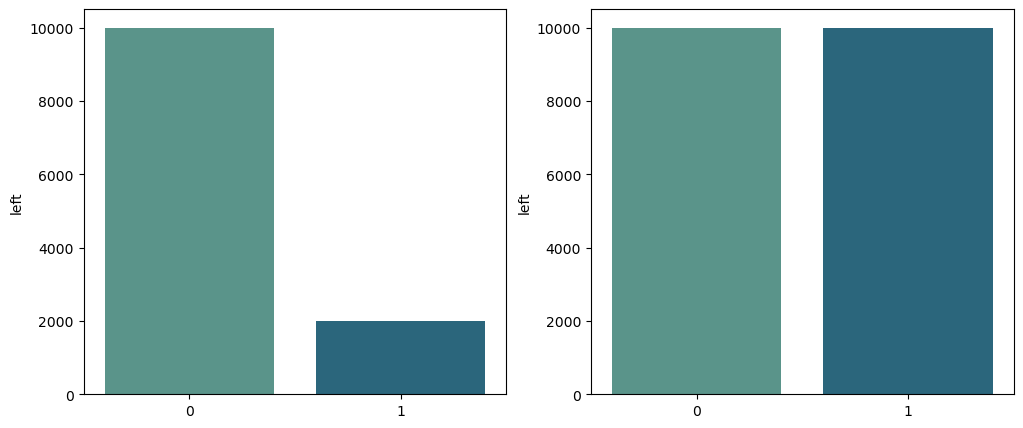

In [29]:
# plot left variable before and after using the SMOTE technique
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.barplot(x=y.value_counts().index, y=y.value_counts(), palette='crest')

# plot after balance
plt.subplot(1,2,2)
sns.barplot(x=labels_resampled.value_counts().index, y=labels_resampled.value_counts(), palette='crest')

## 5. Perform 5-fold cross-validation for model training and performance evaluation.

In [30]:
from sklearn.model_selection import cross_val_predict, cross_validate
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

logistic_regression_model = LogisticRegression(max_iter= 1000)
random_forest_model = RandomForestClassifier()
gradient_boosting_model = GradientBoostingClassifier()

# Perform 5-fold cross-validation and get predicted labels
logistic_regression = pd.DataFrame(cross_validate(logistic_regression_model, features_resampled, labels_resampled, cv=5 , scoring= ['f1','precision','recall']))
random_forest = pd.DataFrame(cross_validate(random_forest_model, features_resampled, labels_resampled, cv=5 , scoring= ['f1','precision','recall']))
gradient_boosting = pd.DataFrame(cross_validate(gradient_boosting_model, features_resampled, labels_resampled, cv=5 , scoring= ['f1','precision','recall']))

In [31]:
logistic_regression.mean()*100

fit_time          278.626146
score_time          1.877904
test_f1            82.749452
test_precision     83.764911
test_recall        83.390000
dtype: float64

In [32]:
random_forest.mean()*100

fit_time          327.511244
score_time         17.931867
test_f1            97.654046
test_precision     99.047436
test_recall        96.330000
dtype: float64

In [46]:
gradient_boosting.mean()*100

fit_time          418.437982
score_time          3.128018
test_f1            95.730037
test_precision     97.436367
test_recall        94.090000
dtype: float64

In [33]:
score_df = pd.DataFrame([logistic_regression.mean()[2:],
                  random_forest.mean()[2:],
                  gradient_boosting.mean()[2:]],
                 index=['LogisticRegression','RandomForest','GradientBoosting'])
score_df

,test_f1,test_precision,test_recall
LogisticRegression,0.827495,0.837649,0.8339
RandomForest,0.976540,0.990474,0.9633
GradientBoosting,0.957300,0.974364,0.9409


<AxesSubplot:>

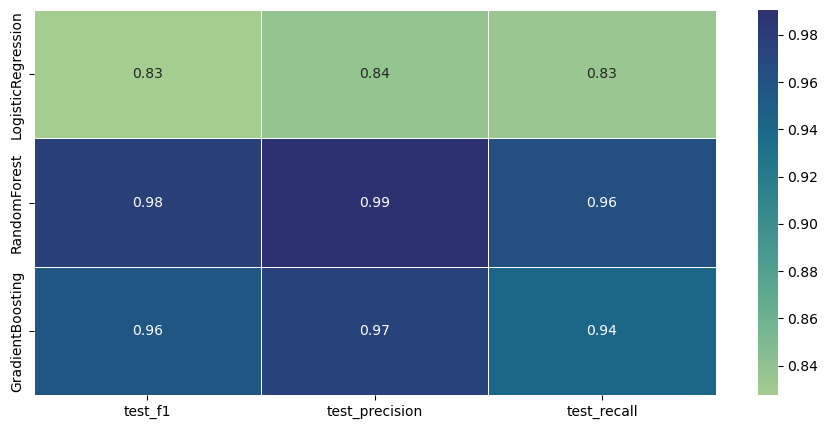

In [34]:
plt.figure(figsize = (11,5))
sns.heatmap(score_df,annot=True, linewidth=.5, cmap='crest')

## 6. Determine the best model and justify the evaluation metrics used.
   
   1. Calculate the ROC/AUC for each model and plot the ROC curves.
   1. Compute the confusion matrix for each model.
   1. Based on the confusion matrix, explain whether Recall or Precision should be prioritized.

* ### the best model is Random forest

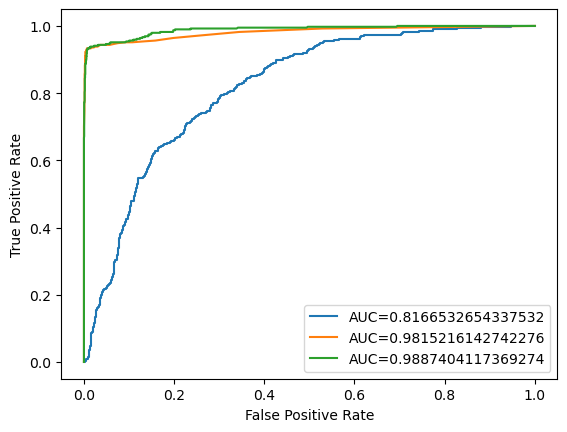

In [47]:
from sklearn import metrics
# ROC plot function
def ROC_plot(model):
    # fit model
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr, label="AUC="+str(auc))

ROC_plot(logistic_regression_model)
ROC_plot(random_forest_model)
ROC_plot(gradient_boosting_model)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

precision: [0.86032028 0.50331126], recall: [0.96266799 0.19487179]
precision: [0.98522167 0.97560976], recall: [0.99552016 0.92307692]
precision: [0.98708395 0.94300518], recall: [0.98904928 0.93333333]


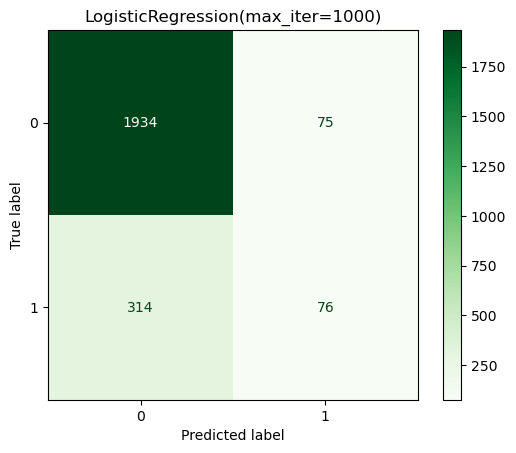

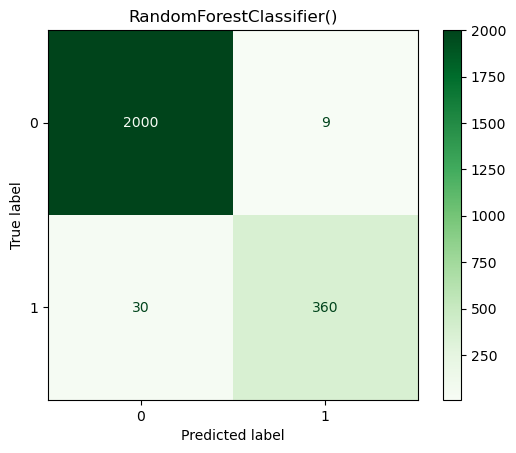

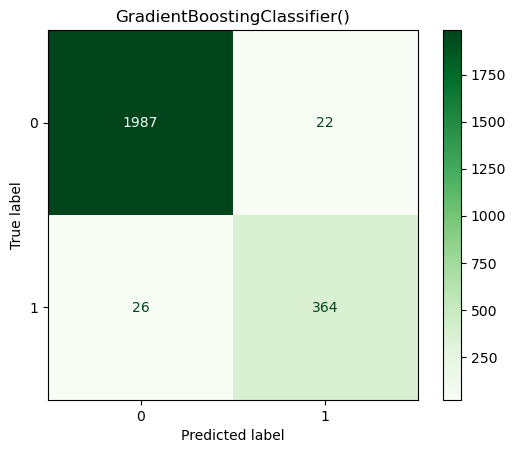

In [45]:
# confusion matrix function
def display_confusion_matrix(model):
    # predict model
    y_pred = model.predict(X_test)
    # confusion_matrix
    confusion_matrix = metrics.confusion_matrix(y_test,  y_pred)
    cm = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
    cm.plot(cmap=plt.cm.Greens)
    cm.ax_.set_title(model)
    
    tp_and_fn = confusion_matrix.sum(1)
    tp_and_fp = confusion_matrix.sum(0)
    tp = confusion_matrix.diagonal()
    precision = tp / tp_and_fp
    recall = tp / tp_and_fn
    print(f'precision: {precision}, recall: {recall}')

display_confusion_matrix(logistic_regression_model)
display_confusion_matrix(random_forest_model)
display_confusion_matrix(gradient_boosting_model)

#### Based on the confusion matrix, explain whether Recall or Precision should be prioritized.

  *  We should weigh more False Negatives and optimize recall because we want to capture as many as employee possible who has high risk of leaving the company.

## 7. Provide various retention strategies for targeted employees.
   1. Use the best model to predict the probability of employee turnover in the test data.
   1. Categorize employees into four zones based on the probability scores and suggest appropriate retention strategies for each zone:
      - Safe Zone (Green) (Score < 20%)
      - Low Risk Zone (Yellow) (20% < Score < 60%)
      - Medium Risk Zone (Orange) (60% < Score < 90%)
      - High Risk Zone (Red) (Score > 90%).

In [37]:
# y_pred = random_forest_model.predict_proba(X_test)
y_pred = random_forest_model[1].predict_proba(X_test)[:,1]
random_forest_precision = metrics.precision_score(y_test, y_pred)
random_forest_precision

C:\Users\loka1\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


0.885286783042394

In [38]:
pd.DataFrame(random_forest_model.predict_proba(X_test)[:,1])

,0
0,0.02
1,0.04
2,0.03
3,0.14
4,0.00
...,...
2394,0.00
2395,0.00
2396,0.01
2397,0.07


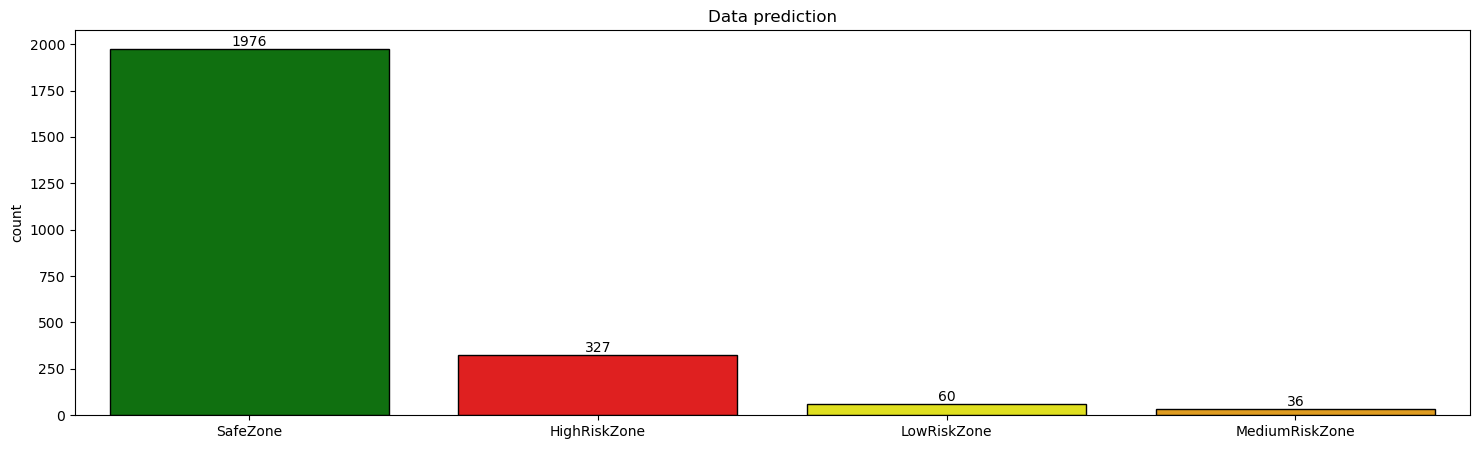

In [39]:
def risk_categorize(val):
    if val < 0.2:
        return 'SafeZone'
    elif val < 0.6:
        return 'LowRiskZone'
    elif val < 0.9:
        return 'MediumRiskZone'
    else:
        return 'HighRiskZone'


yPredProb = random_forest_model.predict_proba(X_test)[:,1] # Probability of someone quitting the job
y_prob_catogrize = [risk_categorize(i) for i in yPredProb] # Probabilities of RandomForest


unique_categories = sorted(set(y_prob_catogrize), key=lambda x: y_prob_catogrize.count(x), reverse=True)

plt.figure(figsize=(18, 5))
plt.title('Data prediction')
ax = sns.countplot(x=y_prob_catogrize, palette=['green', 'red', 'yellow', 'orange'], edgecolor='black', order=unique_categories)
ax.bar_label(ax.containers[0])

plt.show()